In [6]:
import pandas as pd

tmp_df = pd.read_excel('./game.xlsx', sheet_name='Sheet1')

features = tmp_df[['playtime', 'playcount', 'level', 'paycount', 'payamount', 'mainjoblevel']]

print('='*20, 'features 정보입니다.', '='*20)
print(features.shape)
display(features.head())

target = tmp_df['mainjob']

print('='*20, 'target 정보입니다.', '='*20)
print(target.shape)
display(target.head())

==================== features 정보입니다. ====================
(2899, 6)


,playtime,playcount,level,paycount,payamount,mainjoblevel
0,61,1.0,15,1,60300,60
1,14,1.0,15,1,100,60
2,16,1.0,15,1,151,60
3,1300,3.0,15,1,1000,60
4,41,3.0,15,1,16000,60


==================== target 정보입니다. ====================
(2899,)


0    dealer
1    dealer
2    tanker
3    tanker
4    tanker
Name: mainjob, dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=42
)

print('='*20, '분할 이후 train 데이터 크기입니다.', '='*20)
print(X_train.shape)
print(y_train.shape)

print('\n' + '='*20, '분할 이후 test 데이터 크기입니다.', '='*20)
print(X_test.shape)
print(y_test.shape)

print('\n' + '='*20, 'train 데이터와 test 데이터 비율 계산 결과입니다.', '='*20)
print(len(X_train) / (len(X_train) + len(X_test)))
print(len(X_test) / (len(X_train) + len(X_test)))

==================== 분할 이후 train 데이터 크기입니다. ====================
(2319, 6)
(2319,)

==================== 분할 이후 test 데이터 크기입니다. ====================
(580, 6)
(580,)

==================== train 데이터와 test 데이터 비율 계산 결과입니다. ====================
0.7999310106933425
0.20006898930665748


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(target)

print("원래 클래스:", le.classes_)
print("인코딩 결과:", y_encoded[:10])

원래 클래스: ['dealer' 'healer' 'tanker']
인코딩 결과: [0 0 2 2 2 0 0 1 2 1]


==================== LabelEncoding 이전의 분포입니다. ====================


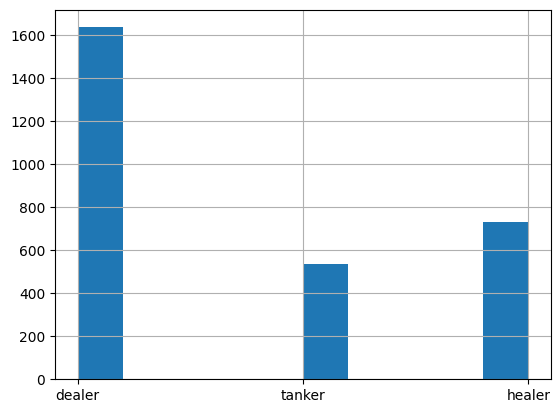

==================== LabelEncoding 이후의 분포입니다. ====================


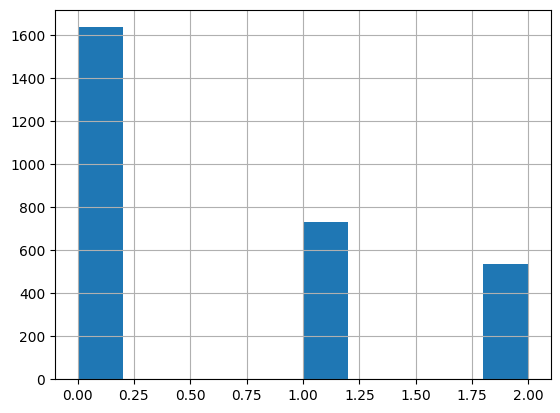

In [10]:
import matplotlib.pyplot as plt

print('='*20, 'LabelEncoding 이전의 분포입니다.', '='*20)
target.hist()
plt.show()

le = LabelEncoder()
target_encoded = le.fit_transform(target)

print('='*20, 'LabelEncoding 이후의 분포입니다.', '='*20)
pd.Series(target_encoded).hist()
plt.show()